In [3]:
# Tokenization using Hugging Face's Transformers
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokens = tokenizer.tokenize("A young girl named Alice sits bored by a riverbank...")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
# Embedding and Processing with a Transformer Model
from transformers import AutoModel
model = AutoModel.from_pretrained("gpt2")
inputs = tokenizer("A young girl named Alice sits bored by a riverbank...", return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

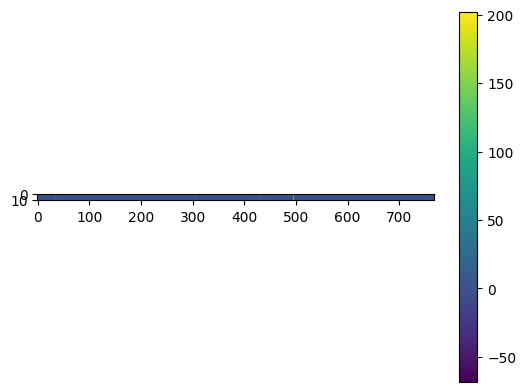

In [6]:
# Visualization of Embeddings (Simplified Example)
import matplotlib.pyplot as plt
plt.imshow(last_hidden_states.detach().numpy()[0], cmap='viridis')
plt.colorbar()
plt.show()

In [7]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load GPT-2 Tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Tokenize text
text = "A young girl named Alice sits bored by a riverbank..."
tokens = tokenizer.tokenize(text)

# Load GPT-2 Model
model = AutoModel.from_pretrained("gpt2")

# Convert text to model input tensors
inputs = tokenizer(text, return_tensors="pt")

# Get hidden states
with torch.no_grad():  # No gradient computation needed
    outputs = model(**inputs)

last_hidden_states = outputs[0]  # First output is the last hidden state

print("Tokenized Text:", tokens)
print("Last Hidden State Shape:", last_hidden_states.shape)  # (batch_size, sequence_length, hidden_dim)


Tokenized Text: ['A', 'Ġyoung', 'Ġgirl', 'Ġnamed', 'ĠAlice', 'Ġsits', 'Ġbored', 'Ġby', 'Ġa', 'Ġriver', 'bank', '...']
Last Hidden State Shape: torch.Size([1, 12, 768])


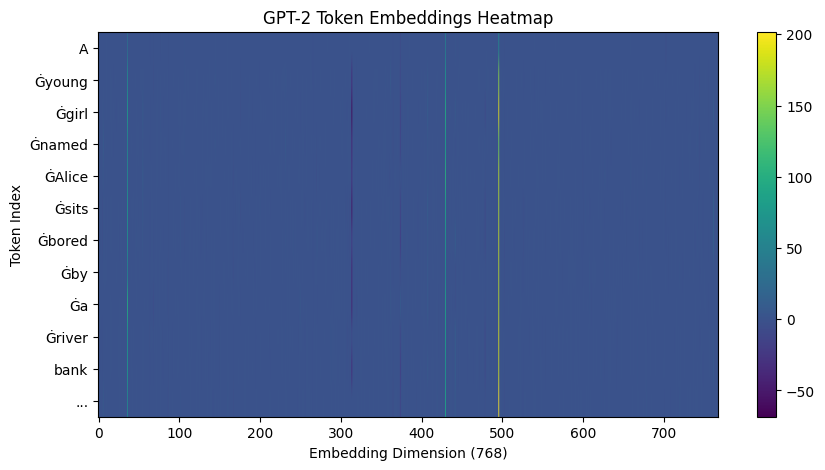

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensor to numpy array
embeddings = last_hidden_states.squeeze().detach().numpy()  # Shape: (12, 768)

plt.figure(figsize=(10, 5))
plt.imshow(embeddings, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel("Embedding Dimension (768)")
plt.ylabel("Token Index")
plt.title("GPT-2 Token Embeddings Heatmap")

# Show token labels on y-axis
plt.yticks(ticks=np.arange(len(tokens)), labels=tokens, fontsize=10)
plt.show()


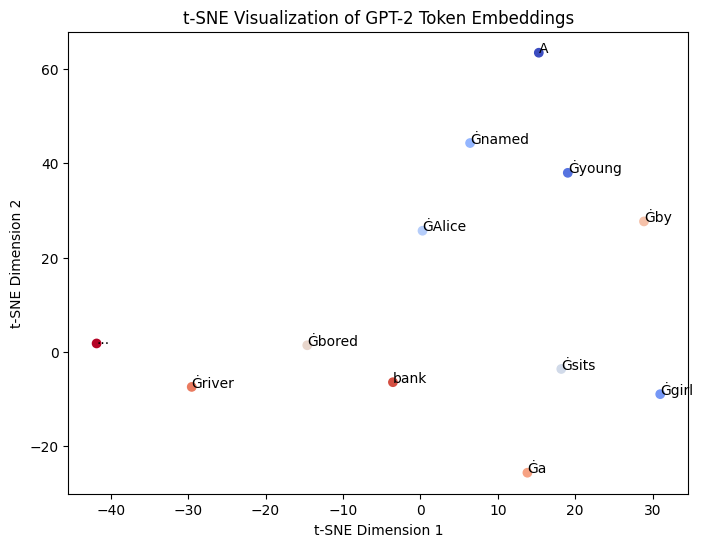

In [9]:
from sklearn.manifold import TSNE

# Reduce dimensions from 768 to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)  # Shape: (12, 2)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=np.arange(len(tokens)), cmap='coolwarm')

# Add token labels
for i, token in enumerate(tokens):
    plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of GPT-2 Token Embeddings")
plt.show()


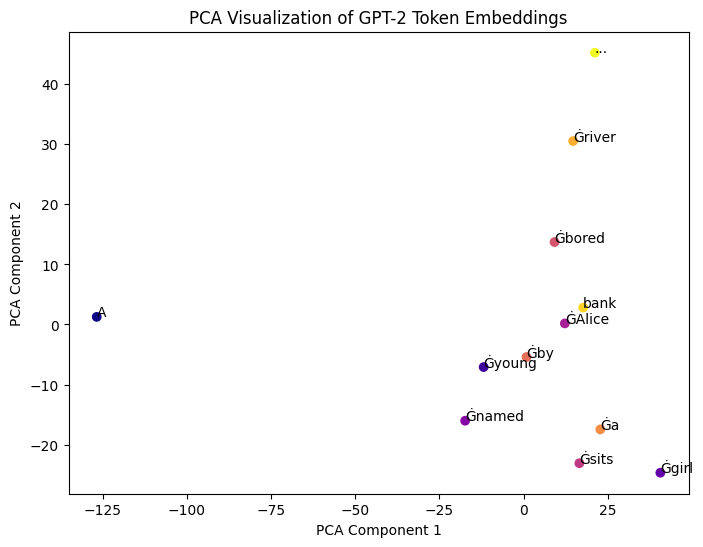

In [10]:
from sklearn.decomposition import PCA

# Reduce dimensions from 768 to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=np.arange(len(tokens)), cmap='plasma')

# Add token labels
for i, token in enumerate(tokens):
    plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of GPT-2 Token Embeddings")
plt.show()


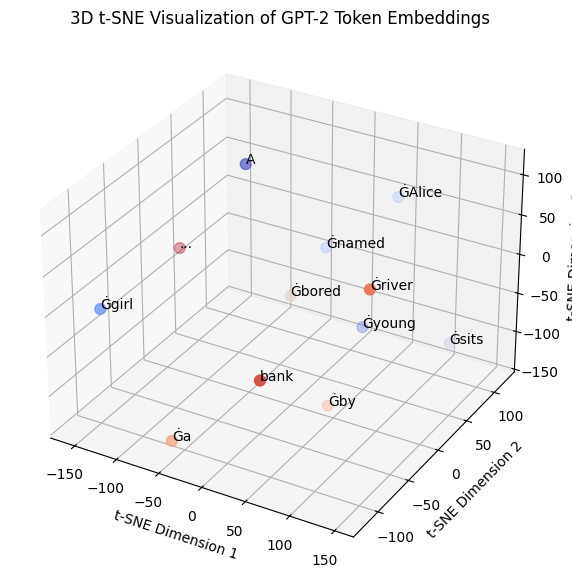

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Convert tensor to numpy array
embeddings = last_hidden_states.squeeze().detach().numpy()  # Shape: (12, 768)

# Reduce dimensions from 768 to 3D using t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=5)
embeddings_3d = tsne.fit_transform(embeddings)  # Shape: (12, 3)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
                     c=np.arange(len(tokens)), cmap='coolwarm', s=60)

# Add token labels to points
for i, token in enumerate(tokens):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], token, fontsize=10)

# Labels
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
ax.set_title("3D t-SNE Visualization of GPT-2 Token Embeddings")

plt.show()


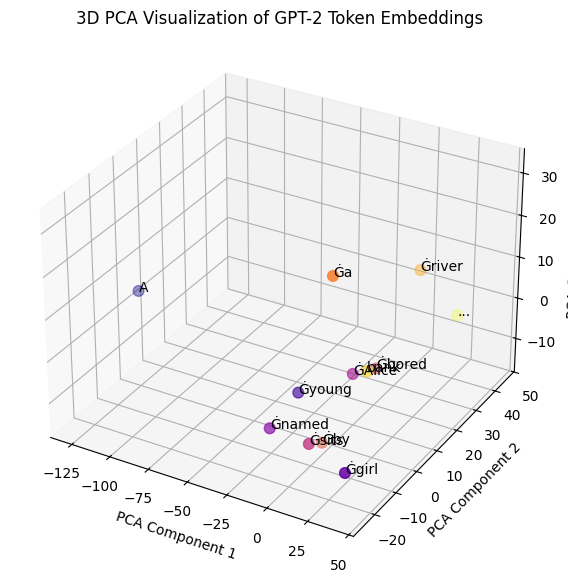

In [12]:
from sklearn.decomposition import PCA

# Reduce dimensions from 768 to 3D using PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
                     c=np.arange(len(tokens)), cmap='plasma', s=60)

# Add token labels to points
for i, token in enumerate(tokens):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], token, fontsize=10)

# Labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization of GPT-2 Token Embeddings")

plt.show()


In [13]:
print(model)

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [14]:
for name, module in model.named_modules():
    print(name, "->", module)


 -> GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)
wte -> Embedding(50257, 768)
wpe -> Embedding(1024, 768)
drop -> Dropout(p=0.1, inplace=False)
h -> ModuleList(
  (0-11): 12 x GPT2Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=Tr

In [15]:
from transformers import GPT2Config

# Load GPT-2 configuration
config = GPT2Config.from_pretrained("gpt2")

# Print configuration details
print(config)


GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.48.3",
  "use_cache": true,
  "vocab_size": 50257
}



In [17]:
!pip install torchviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 755.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

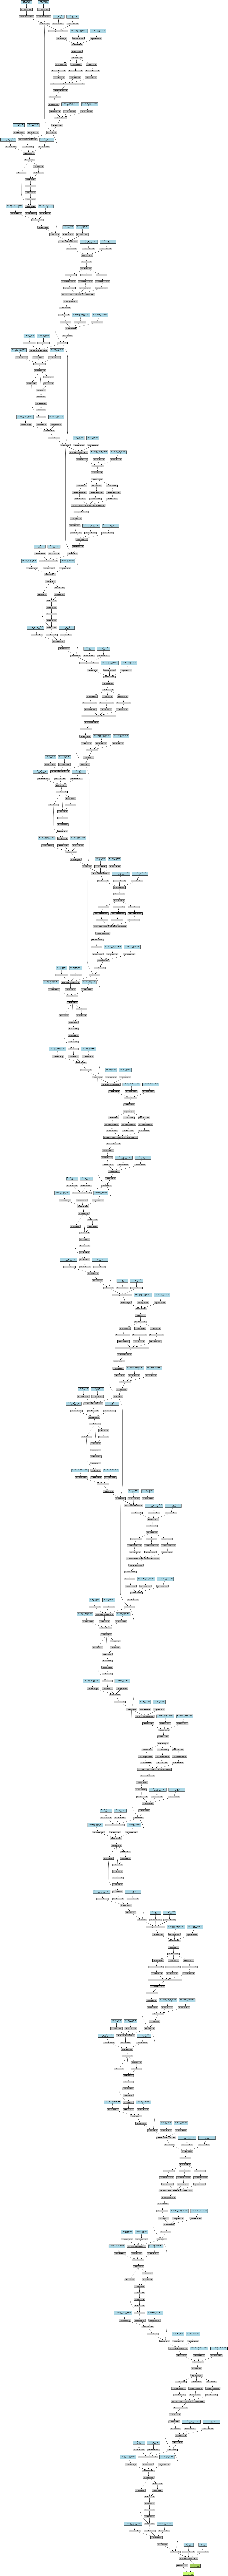

In [18]:
import torch
from transformers import GPT2Model, AutoTokenizer
from torchviz import make_dot

# Load GPT-2 model and tokenizer
model = GPT2Model.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Sample input text
text = "Hello, how are you?"
inputs = tokenizer(text, return_tensors="pt")

# Forward pass through the model
outputs = model(**inputs)

# Generate computational graph
dot = make_dot(outputs.last_hidden_state, params=dict(model.named_parameters()))

# Save as image
dot.format = "png"
dot.render("gpt2_architecture")

# Show the image (optional)
from IPython.display import Image
Image("gpt2_architecture.png")


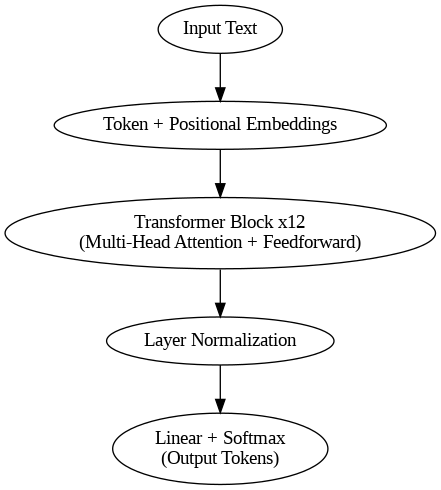

In [19]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph("GPT2_Architecture")

# Add nodes (major components of GPT-2)
dot.node("Input", "Input Text")
dot.node("Embed", "Token + Positional Embeddings")
dot.node("TransformerBlock", "Transformer Block x12\n(Multi-Head Attention + Feedforward)")
dot.node("Norm", "Layer Normalization")
dot.node("LMHead", "Linear + Softmax\n(Output Tokens)")

# Add edges (flow of data)
dot.edge("Input", "Embed")
dot.edge("Embed", "TransformerBlock")
dot.edge("TransformerBlock", "Norm")
dot.edge("Norm", "LMHead")

# Save and display
dot.render("gpt2_block_diagram", format="png", cleanup=True)
from IPython.display import Image
Image("gpt2_block_diagram.png")
